# Iramuteq Export

In [1]:
# Python library imports
%load_ext autoreload
%autoreload 2

import datetime
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
# print redirect
from contextlib import redirect_stdout

## Data Preparation

In [2]:
# Import
df = pd.read_csv('../data/data.csv')

# Select French/German
df = df[df.journal != 'NZZ'].reset_index()

In [16]:
# Select articles
##Date
start_date = '1918-01-01'
end_date = '1918-12-31'

#start_date = '1914-07-28'
#end_date = '1918-11-11'

##Search criteria
keywords = [
        ' Wille ',' Wille,',' Wille.',' Wille:',' Wille;'
]
filters =  pd.Series([False for i in range(0, len(df))])
for keyword in keywords:
    filters |= df.fulltext.str.contains(keyword, regex=False)

df_filtered = df[filters
                & (df.date >= start_date)
                & (df.date <= end_date)]

## IramuteQ output

In [17]:
with open('./iramuteq/' + 'Wille_'+start_date+'_'+end_date+'.txt', 'w+', encoding='utf-8') as f:
    with redirect_stdout(f):
        for index, row in df_filtered.iterrows():
            date = datetime.datetime.strptime(row.date, '%Y-%m-%d').strftime("%d%m%Y")
            #print(f"**** *{row.title} *{row.journal} *{row.date}")
            print(f"**** *page_{row.page} *publi_{row.journal} *date_{date}")
            print(row.fulltext)

In [18]:
len(df_filtered)

19

In [ ]:
len(df)

In [21]:
years = ['1914','1915','1916','1917','1918']
num_articles_old = [172,175,172,84,50]
num_articles     = [39,121,50,32, 19]
num_articles_de = [339, 477, 439, 159, 122]

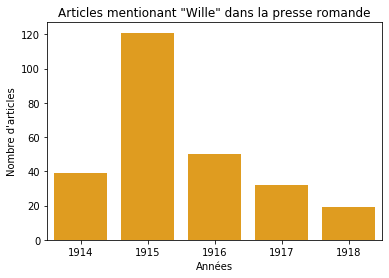

In [22]:
ax = sns.barplot(x=years, y=num_articles, color="orange")
ax.set_title("Articles mentionant \"Wille\" dans la presse romande")
ax.set_xlabel("Années")
ax.set_ylabel("Nombre d'articles")
plt.savefig("Wille.png")
plt.show()

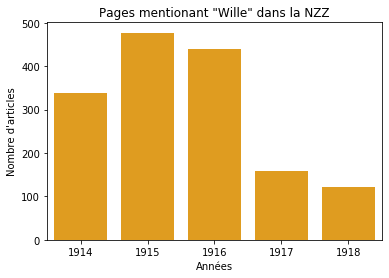

In [35]:
ax = sns.barplot(x=years, y=num_articles_de, color="orange")
ax.set_title("Pages mentionant \"Wille\" dans la NZZ")
ax.set_xlabel("Années")
ax.set_ylabel("Nombre d'articles")
plt.savefig("Wille_NZZ.png")
plt.show()